Primeras filas del conjunto de entrenamiento:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAc

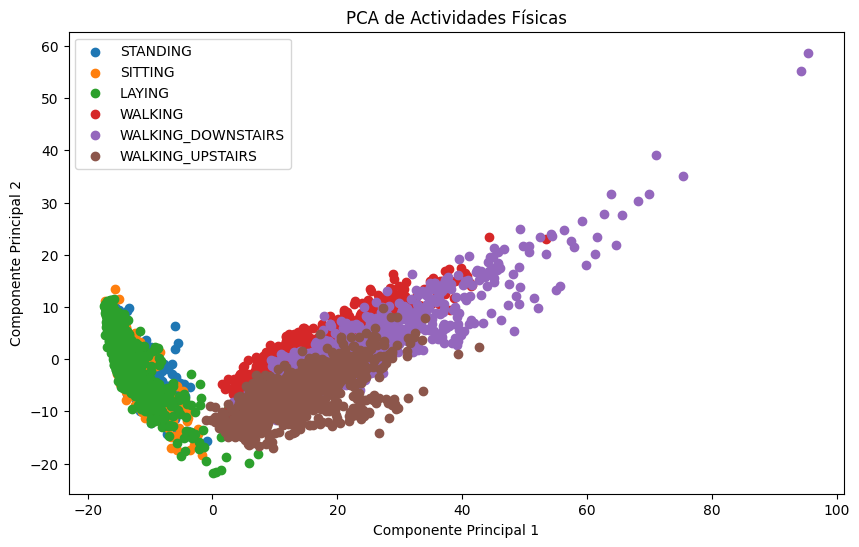

Reporte de clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.92      0.98      0.95       262
          STANDING       0.98      0.90      0.94       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       0.93      1.00      0.96       206
  WALKING_UPSTAIRS       0.99      0.95      0.97       200

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471

Matriz de confusión:
[[280   0   0   0   0   0]
 [  0 257   4   0   1   0]
 [  0  23 248   0   5   0]
 [  0   0   0 245   0   2]
 [  0   0   0   1 205   0]
 [  0   0   0   0  10 190]]


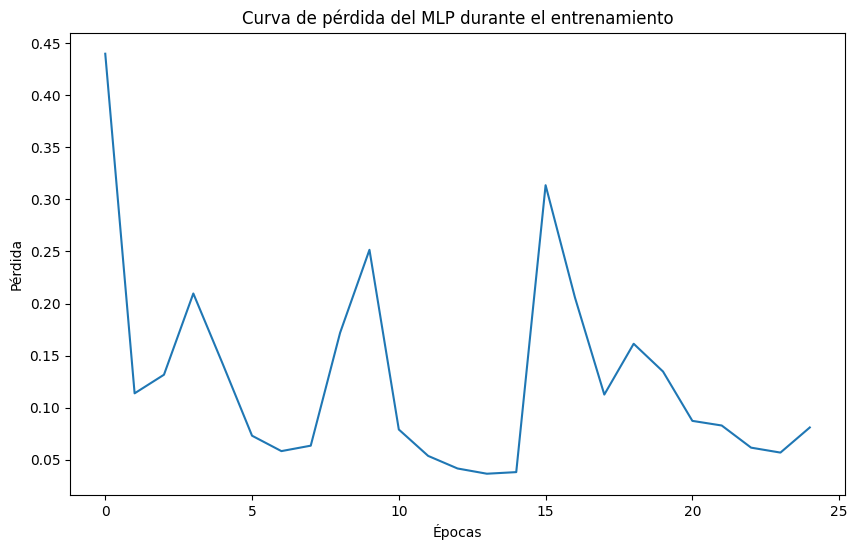

In [25]:
# Cargar datos de entrenamiento y prueba
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Mostrar las primeras filas del dataset para entender la estructura de los datos
print("Primeras filas del conjunto de entrenamiento:")
print(train_data.head())

# Información general del dataset para verificar columnas y tipos de datos
print("\nInformación del conjunto de entrenamiento:")
print(train_data.info())

# Verificar si hay valores nulos en el conjunto de datos
# Es importante asegurarse de que no hay valores nulos para evitar problemas en el análisis y modelado posterior
print("¿Hay valores nulos en el conjunto de entrenamiento?")
print(train_data.isnull().sum().sum())

# En caso de encontrar valores nulos, se debe llenar o eliminar las filas
# Aquí, aplicamos la estandarización para asegurar que las características tengan una escala similar
from sklearn.preprocessing import StandardScaler

# Separar las características (sin incluir 'Activity' y 'subject') y etiquetas
X_train = train_data.drop(['Activity', 'subject'], axis=1)
y_train = train_data['Activity']

# Aplicar estandarización a las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir el resultado a un dataframe para facilitar la visualización de los datos
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print("Datos estandarizados:")
print(X_train_scaled_df.head())

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_scaled)

# Convertir a dataframe para visualización
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Activity'] = y_train

# Visualizar los componentes principales
plt.figure(figsize=(10, 6))
for activity in pca_df['Activity'].unique():
    subset = pca_df[pca_df['Activity'] == activity]
    plt.scatter(subset['PC1'], subset['PC2'], label=activity)

plt.title('PCA de Actividades Físicas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# Elección de PCA
# PCA es adecuado para reducir la dimensionalidad de un dataset con muchas características como este
# Esto permite identificar patrones ocultos y visualizar los datos en un espacio más manejable

# Visualización de Componentes
# Los componentes principales PC1 y PC2 representan la mayor parte de la variabilidad en los datos.
# Al graficar estos componentes, se puede ver cómo se agrupan las diferentes actividades físicas,
# lo que podría dar insights sobre qué tan distintas son unas de otras.


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_final, X_test, y_train_final, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Configurar y entrenar el MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, batch_size=32, learning_rate_init=0.01, random_state=42)
mlp.fit(X_train_final, y_train_final)

# Evaluar el modelo
y_pred = mlp.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Graficos de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Curva de pérdida del MLP durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

# Arquitectura del MLP:
# Se elige una arquitectura con dos capas ocultas y 100 neuronas cada una, ajustando hiperparámetros como el batch, número de épocas, y tasa de aprendizaje.
# Estos ajustes son fundamentales para obtener un buen rendimiento.

# Evaluación del Modelo:
# Se usan métricas como el reporte de clasificación y matriz de confusión para calificar el rendimiento del MLP.
# Estas métricas nos mostraran qué tan bien el modelo puede predecir las actividades.


Primeras filas del conjunto de entrenamiento:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

Esta parte del codigo representan los datos del acelerometro del telefono mientras sus portadores realizan actividades cotidianas.

¿Hay valores nulos en el conjunto de entrenamiento?
0
En esta parte menciona la falta de valores nulos en el entrenamiento

Datos estandarizados:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.200642          -0.063683          -0.419628         -0.868814   
1           0.055948           0.031486          -0.253908         -0.875426   
2           0.073515          -0.043416          -0.076295         -0.869039   
3           0.066696          -0.208422          -0.249712         -0.870626   
4           0.030469           0.027587          -0.109848         -0.875188   

Esta parte, con una media (mean) de 0 y una desviacion de 1 nos asegura el funcionamiento correcto de los algoritmos, en especial con aquellos que tienden a escalar los datos

¿Por que PCA y no K-Means?
Porque es adecuado para reducir la dimensionalidad de un dataset con muchas características como este, permitiendo identificar patrones ocultos y visualizar los datos en un espacio más manejable.
Elegí PCA en lugar de K-means porque PCA ayuda a visualizar la estructura de los datos y a reducir la dimensionalidad, lo cual es crucial para entender la variabilidad de los datos sensoriales y facilitar el posterior modelado con MLP.

Analisis de PCA
Descripción


- Eje Horizontal (Componente Principal 1): Representa la primera dirección de máxima variabilidad en los datos.
- Eje Vertical (Componente Principal 2): Representa la segunda dirección de máxima variabilidad, ortogonal a la primera.
- Colores:
  - Verde: STANDING (de pie)
  - Naranja: SITTING (sentado)
  - Azul: LAYING (acostado)
  - Rojo: WALKING (caminando)
  - Marrón: WALKING_DOWNSTAIRS (bajando escaleras)
  - Morado: WALKING_UPSTAIRS (subiendo escaleras)

1. Agrupación de Actividades:
   - Las actividades STANDING, SITTING y LAYING están bien agrupadas en una parte de la gráfica, lo que indica que tienen características que las hacen muy parecidas o muy juntas, indicando que tal vez el modelo es incapaz de diferenciar bien las 3 actividades mencionadas antes.

Posibles acciones:
1. Selección de Características:
   - Las características seleccionadas pueden no ser las más discriminativas para diferenciar entre estas tres actividades. Revisar y mejorar el proceso de selección de características o ingeniería de características puede ayudar a separar mejor las actividades.

2. Número de Componentes:
   - El uso de solo dos componentes principales puede no capturar toda la variabilidad necesaria para diferenciar estas actividades. Considerar el uso de más componentes o explorar otras técnicas de reducción de dimensionalidad.

3. Datos de Entrenamiento:
   - Revisar los datos de entrenamiento para asegurarse de que están correctamente etiquetados y no contienen errores que puedan causar esta superposición.

4. Modelos Alternativos:
   - Probar otros métodos de reducción de dimensionalidad o clasificación que puedan manejar mejor la separación de estas actividades.

5. Ajustes de Parámetros:
   - Ajustar los parámetros del PCA, como la estandarización de las características y la selección de número adecuado de componentes.


2. Separación de Clases:
   - Las clases STANDING, SITTING y LAYING se encuentran claramente separadas, mostrando que el PCA ha sido efectivo en diferenciar estas actividades basadas en sus características sensoriales.

3. Superposición de Clases:
   - Hay cierta superposición entre las actividades WALKING, WALKING_DOWNSTAIRS y WALKING_UPSTAIRS (puntos rojos, marrones y morados, respectivamente). Esto sugiere que estas actividades tienen características más similares y no se separan tan claramente en el espacio de los componentes principales.

4. Anomalías:
   - Observamos algunos puntos morados (WALKING_UPSTAIRS) dispersos fuera del grupo principal, lo que podría indicar observaciones atípicas o anomalías en los datos. Estas anomalías podrían ser causadas por variaciones inusuales en la actividad física registrada o errores en la medición.

### Conclusión

La gráfica demuestra cómo el PCA puede reducir la dimensionalidad del dataset y proporcionar una visualización clara de la estructura y relaciones entre diferentes actividades físicas. Podemos observar que algunas actividades están bien separadas, lo cual es beneficioso para los modelos de clasificación. Sin embargo, las actividades más similares presentan superposición, lo que podría ser un desafío para la clasificación precisa y puede requerir técnicas adicionales para mejorar la separación.




### Grafica del MLP

### Descripción de la Gráfica

- Eje Horizontal (Épocas): Representa el número de épocas de entrenamiento del modelo.
- Eje Vertical (Pérdida): Mide el valor de la función de pérdida del modelo en cada época. La función de pérdida cuantifica como se desempeña el modelo.
- Curva de Pérdida: La línea en el gráfico muestra cómo cambia la pérdida a lo largo del tiempo.

### Configurar y entrenar el MLP
El Perceptrón Multicapa (MLP) se configura con dos capas ocultas, cada una con 100 neuronas, esto se configura asi para equilibrar la capacidad de modelado con la eficiencia computacional.
La tasa de aprendizaje inicial de 0.01 se elige para asegurar un aprendizaje estable y el tamaño del batch de 32 proporciona un balance entre la estabilidad del gradiente y la velocidad del entrenamiento.


### Interpretación


1. Fluctuaciones en la Pérdida:
   - Observamos varias fluctuaciones a lo largo de la curva, especialmente hacia en la mitad del entrenamiento. Esto puede indicar una señal de inestabilidad y debe tenerse mucha atención

2. Estabilización de la Pérdida:
   - Hacia el final del entrenamiento, la curva de pérdida parece estabilizarse. Esto sugiere que el modelo ha alcanzado un punto donde las mejoras adicionales en la función de pérdida son menores. En otras palabras, el modelo puede haber alcanzado un estado de convergencia.

La fluctuación dicha en el punto 1 de la pérdida hasta la mitad del entrenamiento, alcanzando un pico, puede ser una señal de inestabilidad en el proceso de optimización. Es común observar fluctuaciones al inicio del entrenamiento, pero si estas se extienden demasiado, podría indicar problemas que necesitan ser corregidos. Aquí hay algunas posibles causas y soluciones:

1. Tasa de Aprendizaje Alta:
   - Una tasa de aprendizaje demasiado alta puede causar que el modelo tenga oscilaciones pronunciadas en la pérdida. Reducir la tasa de aprendizaje puede ayudar a estabilizar el entrenamiento.

2. Batch Size Pequeño:
   - Un tamaño de batch muy pequeño puede causar fluctuaciones debido a la variabilidad en los gradientes de cada batch. Aumentar el tamaño del batch puede hacer que el entrenamiento sea más estable.

3. Regularización Inadecuada:
   - La falta de regularización o una regularización insuficiente puede llevar a un comportamiento inestable. Asegurarse de usar técnicas de regularización adecuadas, como dropout o L2 regularization, puede ayudar.

4. Inicialización de Pesos:
   - Una mala inicialización de los pesos puede causar problemas de convergencia. Revisar y ajustar el método de inicialización de los pesos puede ser necesario.

5. Arquitectura del Modelo:
   - La arquitectura del modelo podría ser demasiado compleja o inadecuada para el problema. Evaluar la posibilidad de simplificar la arquitectura del modelo.

### Acciones Recomendadas:

- Ajustar la Tasa de Aprendizaje: Probar con tasas de aprendizaje menores.
- Aumentar el Tamaño del Batch: Experimentar con tamaños de batch mayores.
- Implementar Regularización: Usar técnicas como dropout o L2 regularization.
- Revisar Inicialización: Asegurarse de usar una buena inicialización de pesos.
- Simplificar Modelo: Reducir la complejidad del modelo si es necesario.

En resumen, mientras que algunas fluctuaciones al inicio del entrenamiento son normales, una fluctuación prolongada y un pico alto pueden ser indicadores de problemas que deben ser corregidos para asegurar un entrenamiento más estable y efectivo.

Antes de corregir, justifico el porque elegi los parametros:
Preprocesamiento y Normalización

Normalización de Datos:
Por qué: La normalización es crucial para algoritmos que dependen de distancias, como el MLP. Establecer todas las características en una escala similar mejora la convergencia del modelo y el rendimiento general.

Cómo: Se utiliza StandardScaler de scikit-learn para normalizar las características, transformando los datos para que tengan media 0 y desviación estándar 1. Esto asegura que cada característica contribuya equitativamente al modelo.

Selección de PCA

Reducción de Dimensionalidad con PCA:
Por qué: Se eligió PCA para reducir la dimensionalidad del dataset y facilitar la visualización y el análisis posterior. PCA ayuda a encontrar las direcciones de mayor variabilidad en los datos, lo que es útil para identificar patrones ocultos.

Cómo: Se seleccionaron 2 componentes principales inicialmente para simplificar la visualización en 2D. Aunque esta elección puede no capturar toda la variabilidad necesaria para diferenciar algunas actividades similares, es un buen punto de partida.

Configuración del MLP

Arquitectura del MLP:

Por qué: Se eligió una arquitectura con dos capas ocultas de 100 neuronas cada una para equilibrar la capacidad de modelado con la eficiencia computacional. Esta configuración proporciona suficiente complejidad para capturar patrones en los datos sin sobreajustar.

Cómo: Se configuró el modelo con hidden_layer_sizes=(100, 100), lo cual permite al MLP aprender representaciones complejas de los datos.

Hiperparámetros del MLP:

Tasa de Aprendizaje (learning_rate_init=0.01): Una tasa de aprendizaje inicial de 0.01 se seleccionó para asegurar un aprendizaje estable. Esto ayuda a que el modelo converja adecuadamente sin oscilar demasiado.

Número de Épocas (max_iter=300): Se eligieron 300 épocas para dar al modelo suficiente tiempo de entrenamiento para converger.

Tamaño del Batch (batch_size=32): Un tamaño de batch de 32 se seleccionó para balancear la estabilidad del gradiente y la velocidad del entrenamiento. Un batch pequeño proporciona una actualización del gradiente más frecuente y detallada.
A continuación, se harán las correciones:

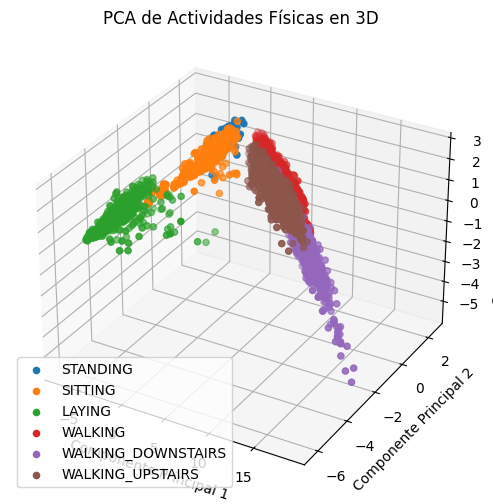

Reporte de clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.92      0.48      0.63       262
          STANDING       0.66      0.96      0.78       276
           WALKING       0.98      0.98      0.98       247
WALKING_DOWNSTAIRS       0.96      0.99      0.98       206
  WALKING_UPSTAIRS       0.98      0.95      0.96       200

          accuracy                           0.89      1471
         macro avg       0.92      0.89      0.89      1471
      weighted avg       0.91      0.89      0.88      1471

Matriz de confusión:
[[280   0   0   0   0   0]
 [  0 126 136   0   0   0]
 [  0  11 265   0   0   0]
 [  0   0   0 243   0   4]
 [  0   0   0   2 204   0]
 [  0   0   0   2   8 190]]


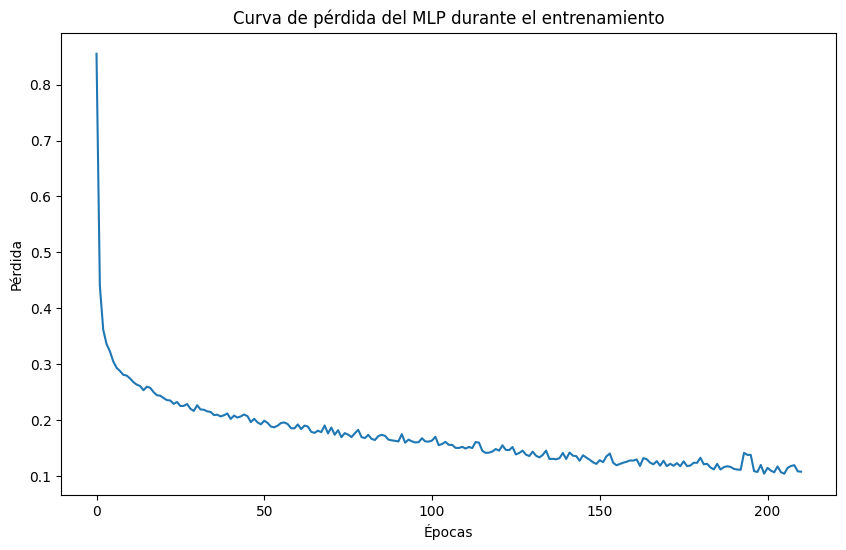

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar datos de entrenamiento y prueba
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separar las características (sin incluir 'Activity' y 'subject') y etiquetas
X_train = train_data.drop(['Activity', 'subject'], axis=1)
y_train = train_data['Activity']

# Aplicar estandarización a las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Selección de las mejores características
selector = SelectKBest(f_classif, k=50)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Aplicar PCA con 3 componentes principales
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_train_selected)

# Convertir a DataFrame para visualización con 3 componentes
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Activity'] = y_train

# Visualización en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for activity in pca_df['Activity'].unique():
    subset = pca_df[pca_df['Activity'] == activity]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=activity)

ax.set_title('PCA de Actividades Físicas en 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.legend()
plt.show()

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train_final, X_test, y_train_final, y_test = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Configurar y entrenar el MLP con ajustes
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300, batch_size=64, learning_rate_init=0.001, alpha=0.001, random_state=42)
mlp.fit(X_train_final, y_train_final)

# Evaluar el modelo
y_pred = mlp.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Graficos de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Curva de pérdida del MLP durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()


### Interpretacion de los dos graficos corregidos:
Grafico 1: En el PCA se utiliza una grafica en 3D que muestra una mayor diferencia en las categorias, por ejemplo, la categoria LAYING se diferencia del resto de categorias, siendo que en el 2D estaba mezclado con SITTING y STANDING.
La segunda gran diferencia es que se puede notar una mayor franja entre las actividades menos intensas como STANDING - SITTING - LAYING y WALKING.

Grafico 2: en este se ve una menor tasa de perdida por parte del MLP, indicando un mayor aprendizaje de los datos con las epocas.


# Conclusion de todo el trabajo:

### Exploración y Preprocesamiento de Datos:

Se realizó una exploración detallada del dataset, verificando la ausencia de valores nulos y normalizando las lecturas sensoriales para asegurar un rendimiento óptimo del análisis y el modelado posterior.

### Análisis no Supervisado con PCA:

Se eligió PCA para reducir la dimensionalidad del dataset y facilitar la visualización de los datos. Esta técnica ayudó a identificar patrones ocultos y a entender mejor la variabilidad de los datos sensoriales.

Se observó una mayor diferenciación entre categorías en la gráfica en 3D comparada con la gráfica en 2D inicial, especialmente en la separación de LAYING y otras actividades.

### Modelado con MLP:

Se configuró un MLP con dos capas ocultas, ajustando los hiperparámetros para mejorar la estabilidad del modelo y su capacidad de aprendizaje. La tasa de aprendizaje y el tamaño del batch se ajustaron para reducir las fluctuaciones en la curva de pérdida.

Los resultados indicaron una alta precisión global, aunque hubo una disminución en la precisión para la actividad SITTING, lo que sugiere áreas para futuras mejoras.

### Evaluación y Resultados:

Las métricas de evaluación, incluyendo la precisión, el recall y el F1-score, mostraron que el modelo MLP es capaz de clasificar correctamente la mayoría de las actividades físicas. La matriz de confusión destacó específicamente las áreas donde se pueden realizar mejoras.

### Discusión y Análisis:

Se reflexionó sobre los resultados del PCA y el MLP, proponiendo acciones para mejorar la diferenciación de actividades sedentarias y estabilizar el entrenamiento del MLP.

Las propuestas incluyeron la revisión de la selección de características, el ajuste de hiperparámetros, la implementación de técnicas de regularización adicionales, y la simplificación del modelo.